In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_P1_1 = pd.read_excel("P001_001.xlsx")
df_P1_2 = pd.read_excel("P001_002.xlsx")
df_P1_3 = pd.read_excel("P001_003.xlsx")
df_P1_4 = pd.read_excel("P001_004.xlsx")
df_P1_5 = pd.read_excel("P001_005.xlsx")
df_P1_6 = pd.read_excel("P001_006.xlsx")
df_P1_7 = pd.read_excel("P001_007.xlsx")
df_P1_8 = pd.read_excel("P001_008_offaxis.xlsx")
df_P1_9 = pd.read_excel("P001_009.xlsx")
df_P1_10 = pd.read_excel("P001_010.xlsx")


df_P1_11 = pd.read_excel("P001_011.xlsx")
df_P1_12 = pd.read_excel("P001_012.xlsx")
df_P1_13 = pd.read_excel("P001_013.xlsx")
df_P1_14 = pd.read_excel("P001_014.xlsx")

In [ ]:
df_P2_13 = pd.read_excel("P002_013.xlsx")
df_P2_14 = pd.read_excel("P002_014.xlsx")

In [ ]:
# Normalization
def Normalization(df):

  List = list(df)
  for i in List:
    max = df[i].max()
    min = df[i].min()
    for j in range(len(df[i])):
      df[i].iloc[j] = (df[i].iloc[j]-min)/(max-min)
  return df

In [ ]:
df_P1_1 = Normalization(df_P1_1)
df_P1_2 = Normalization(df_P1_2)
df_P1_3 = Normalization(df_P1_3)
df_P1_4 = Normalization(df_P1_4)
df_P1_5 = Normalization(df_P1_5)
df_P1_6 = Normalization(df_P1_6)
df_P1_7 = Normalization(df_P1_7)
df_P1_8 = Normalization(df_P1_8)
df_P1_9 = Normalization(df_P1_9)
df_P1_10 = Normalization(df_P1_10)
df_P1_11 = Normalization(df_P1_11)
df_P1_12 = Normalization(df_P1_12)
df_P1_13 = Normalization(df_P1_13)
df_P1_14 = Normalization(df_P1_14)
df_P2_13 = Normalization(df_P2_13)
df_P2_14 = Normalization(df_P2_14)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# peckinge and sorting dataset without robot



In [ ]:
frame = [df_P1_1, df_P1_2, df_P1_3, df_P1_4, df_P1_5 ]

In [ ]:
peckinge_dataset = pd.concat(frame)

In [ ]:
peckinge_dataset.shape

(50905, 70)

In [ ]:
peckinge_dataset.head()

,Timestamp,Pelvis_x,Pelvis_y,Pelvis_z,L5_x,L5_y,L5_z,L3_x,L3_y,L3_z,...,LeftUpperLeg_z,LeftLowerLeg_x,LeftLowerLeg_y,LeftLowerLeg_z,LeftFoot_x,LeftFoot_y,LeftFoot_z,LeftToe_x,LeftToe_y,LeftToe_z
0,0.000000,0.079830,0.864688,0.671853,0.079532,0.858807,0.854355,0.081614,0.846043,0.947130,...,0.727127,0.082495,0.863089,0.434136,0.082813,0.856869,0.083565,0.106956,0.840893,0.023704
1,0.000074,0.079842,0.864671,0.672392,0.079545,0.858803,0.854917,0.081632,0.846051,0.947364,...,0.727115,0.082662,0.863019,0.433361,0.082802,0.856903,0.083192,0.106972,0.840950,0.025200
2,0.000144,0.079854,0.864654,0.672943,0.079558,0.858798,0.855478,0.081650,0.846059,0.947598,...,0.727090,0.082829,0.862949,0.432576,0.082792,0.856938,0.082826,0.106988,0.841006,0.026696
3,0.000218,0.079881,0.864641,0.673283,0.079584,0.858794,0.855837,0.081680,0.846066,0.947744,...,0.727040,0.083062,0.862838,0.431703,0.082779,0.856948,0.082562,0.106997,0.841040,0.027954
4,0.000292,0.079930,0.864631,0.673401,0.079632,0.858787,0.855944,0.081730,0.846068,0.947785,...,0.727040,0.083375,0.862662,0.430733,0.082758,0.856914,0.082381,0.106993,0.841034,0.028858


# Inventory Dataset without robot

In [ ]:
frame2 = [df_P1_11, df_P1_12, df_P2_13, df_P2_14]
inventory_dataset = pd.concat(frame2)

In [ ]:
inventory_dataset.shape

(50641, 70)

In [ ]:
del inventory_dataset['Timestamp']
del peckinge_dataset['Timestamp']

In [ ]:
inventory_dataset.to_csv("inventory_dataset.csv", index=False)
peckinge_dataset.to_csv("peckinge_dataset.csv", index=False)

In [ ]:
inventory_dataset = pd.read_csv("inventory_dataset.csv")
peckinge_dataset = pd.read_csv("peckinge_dataset.csv")

# prepares la clasification des données

In [ ]:
def import_data(dataframe, classe):
  train_data = np.empty((0,69))
  train_classe = np.empty((0,1))
  for i in range(len(dataframe)):
    train_data=np.concatenate((train_data,dataframe.iloc[[i]]))
    train_classe=np.concatenate((train_classe,[[classe]]))
  return train_data, train_classe

In [ ]:
x_pecking_data, y_pecking_data = import_data(peckinge_dataset,1)
x_inventory_data, y_inventory_data = import_data(inventory_dataset,2)

In [ ]:
X = np.concatenate((x_pecking_data,x_inventory_data), axis = 0)
y = np.concatenate((y_pecking_data,y_inventory_data), axis = 0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score, confusion_matrix)
#fit the model with naive Bayes algorithm
model_nb = GaussianNB()   
model_nb.fit(X_train, y_train)
#Prédire les données de test
y_pred_nb = model_nb.predict(X_test) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import matplotlib.pyplot as plt

def visualisier_resultat(y_test, y_pred, algo, modele):
  #Evaluer le modele : Matrice de confusion
  confusion_m= confusion_matrix(y_test, y_pred) 
  print("Matrice de confusion \n", confusion_m) #Evaluer le modele : Accuracy
  acc = accuracy_score(y_test,y_pred) 
  print("Accuracy : ",acc)
  #Precision
  precision = precision_score(y_test,y_pred, pos_label='positive',average='micro')
  print("precision : ",precision)
  #Rappel
  rappel = recall_score(y_test,y_pred,pos_label='positive',average='micro')
  print("Rappel : ",rappel)
  #F-mesure
  f_mesure=f1_score(y_test, y_pred, labels=None, pos_label=1, average='micro',sample_weight=None,zero_division='warn') 
  print("f_mesure : ",f_mesure) #Graphiquement K-means
  u_labels = np.unique(y_pred)
  for i in u_labels:
    plt.scatter(X_test[y_pred==i,0] , X_test[y_pred== i,1], label = 'Classes')
    if algo == 'KM':
      plt.scatter(modele.cluster_centers_[:, 0],modele.cluster_centers_[:, 1],c='black',label='Centroids')
  plt.plot()
  plt.show()


Matrice de confusion 
 [[13374  1969]
 [ 2322 12799]]
Accuracy :  0.8591452205882353
precision :  0.8591452205882353
Rappel :  0.8591452205882353
f_mesure :  0.8591452205882353


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


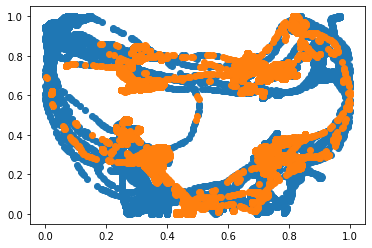

In [ ]:
visualisier_resultat(y_test, y_pred_nb,'NB',model_nb)

Résultat :  [0.59310684 0.27572624 0.5783358  0.46371246 0.51866076 0.
 0.         0.         0.         0.        ]
Matrice de confusion 
 [[   0    0    0]
 [8415 6928    0]
 [7576 7545    0]]
Accuracy :  0.22741596638655462
precision :  0.22741596638655462
Rappel :  0.22741596638655462
f_mesure :  0.22741596638655462


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


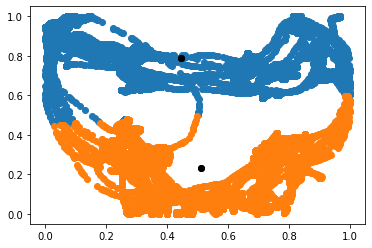

In [ ]:
from sklearn.cluster import KMeans
from sklearn import model_selection
model_km = KMeans(2)
#Entrainer le modéle K-means en utilisant X_train 
model_km.fit(X_train, y_train)
#Cross validation 10_fold
succes = model_selection.cross_val_score(model_km, X, y, cv=10,scoring='accuracy')
print('Résultat : ', succes)
#Prédire les données de test
y_pred_km = model_km.predict(X_test) 
visualisier_resultat(y_test, y_pred_km,'KM',model_km)

In [ ]:
X_test

array([[0.36724734, 0.30454506, 0.02635503, ..., 0.3335752 , 0.32695386,
        0.06648312],
       [0.55570962, 0.03932891, 0.76686386, ..., 0.55514493, 0.04489129,
        0.09401652],
       [0.74250747, 0.71143011, 0.95294861, ..., 0.70950647, 0.69210672,
        0.07873867],
       ...,
       [0.7259252 , 0.31486445, 0.79571457, ..., 0.70030713, 0.25936052,
        0.10856845],
       [0.7372086 , 0.35011147, 0.35578927, ..., 0.71041344, 0.37508526,
        0.07889348],
       [0.11969661, 0.31470579, 0.99167514, ..., 0.11547448, 0.32569935,
        0.06502293]])

In [ ]:
#Prédire les données de test
y_pred_nb = model_nb.predict(X_test[[0]]) 

In [ ]:
y_pred_nb

array([2.])

In [ ]:
y_test[0]

array([2.])

In [ ]:
def preprosess_data(dataframe):
  train_data = np.empty((0,69))
  for i in range(len(dataframe)):
    train_data=np.concatenate((train_data,dataframe.iloc[[i]]))
  return train_data

In [ ]:
def clasification(X):
  y_pred_nb = model_nb.predict(X)
  print(y_pred_nb)
  # Convert the predictions to a 1D array of class indices
  predictions = y_pred_nb.astype('int')
  print(predictions)
  # Get the class with the majority of occurrences
  majority_class = np.bincount(predictions).argmax()
  if(majority_class == 1):
    return "sorting and pecking"
  elif(majority_class == 2):
    return "inventory checking" 

In [ ]:
#df_P2_4 = pd.read_excel("P002_004.xlsx")
#del df_P2_4['Timestamp']

In [ ]:
df_P1_4.shape
del df_P1_4['Timestamp']

In [ ]:
#data_P2_sorting = preprosess_data(df_P2_4)
print(clasification(df_P1_4))

[1. 1. 1. ... 1. 1. 1.]
[1 1 1 ... 1 1 1]
sorting and pecking


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [ ]:
#df_P2_13 = pd.read_excel("P002_013.xlsx")
#del df_P2_13['Timestamp']
#del df_P2_13['Timestamp']

print(clasification(df_P2_13))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


ValueError: ignored

In [ ]:
#df_P2_14 = pd.read_excel("P002_014.xlsx")
#del df_P2_14['Timestamp']
data_P2_invonery = preprosess_data(df_P2_14)
print(clasification(data_P2_invonery))